**Proyecto Modulo #2**

Alondra Estefania Barajas Esparza

Pablo Crowley Mora

## "Análisis de datos financieros en empresas relacionadas con la construcción."

###### > Las empresas de construcción son muy importantes en nuestro entorno, dado que a donde se mire se encontrará una estructura o un edificio que, como fruto de las empresas dedicadas a la construcción, que en este caso analizaremos 4 empresas que estén en el ámbito de la construcción.
###### Empresas a analizar en este caso, todas son empresas que operan en Mexico.
- **Desarrolladora Homex**
- **Grupo Carso, SAB de CV**
- **CEMEX, SAB de CV**
- **Infraestructura Energética Nova, SAB de CV**
###### Por eso con este proyecto daremos a conocer si algunas empresas que se encuentran en la bolsa de valores son susceptibles como punto de inversión.

## Objetivos


##### 1.1 Objetivo general 

> - El proyecto se tratará de un análisis de precio umbral, de algunas empresas en Yahoo! finance, que tengan que ver con la construcción y sus derivados, analizar el precio de acción conforme lo años, y analizar con Montecarlo alguno de los años, para poder apreciar si tendríamos una oportunidad de inversión y hacer análisis de si la probabilidad es buena o no. en cuanto a valores reales.


##### 1.2 Objetivos específicos 

> - Predecir la evolución de los precios de la acción del 2019, y compararlos con los valores reales (se importara los datos desde 2013 hasta 2018 para poder evaluar sus respectivos comportamientos).
> - Obtener las probabilidades del 2019, deseando un aumento del precio umbral del 10% del precio de la acción.
> - Realizar comparaciones y Análisis de lo que dicen nuestras probabilidades, contra la realidad.

#### 1.3 Modelo que representa el problema.

> - En la actualidad Python ha acumulado mucho interés recientemente como una opción de lenguaje para el análisis de datos.

> - En este proyecto aplicaremos manejo de datos con la ayuda de pandas, con finalidad de tener una correcta manipulación de estos y hacerlo de forma remota desde Yahoo Finance.
> - Utilizaremos pandas_datareader, posteriormente importaremos los datos 
> -Una vez que se obtienen los datos, dispondremos a ponerlos de manera gráfica para tener una idea más clara, con la finalidad de operar con ellos. 
> -Usos de la simulación Montecarlo para simulación de escenarios, con la finalidad de obtener probabilidades y con esto tomar decisiones.

> - Los precios diarios de cierro ajustados no son un proceso estocástico, pero si los rendimientos diarios, por lo cual procedemos a calcularlos. A partir de los precios de cierre.

> - En cuanto a la distribución normal tenemos que:


En estadística y probabilidad se llama distribución normal, distribución de Gauss, distribución gaussiana o distribución de Laplace-Gauss, a una de las distribuciones de probabilidad de variable continua que con más frecuencia aparece en estadística y en la teoría de probabilidades.


> - Para una sucesión de precios $\{S_t\}_{t=0}^{n}$, el rendimiento simple $R_t$ se define como el cambio porcentual

$$
R_t=\frac{S_t-S_{t-1}}{S_{t-1}}\approx \ln\left(\frac{S_t}{S_{t-1}}\right)=r_t.
$$
para $t=1,\ldots,n$.

> - Una vez calculados los rendimeintos se calculan precios de cierre.

$$\begin{align}
p_i&=p_{i-1}(R_i+1)\\
p_{i+1}&=p_i(R_{i+1}+1)=p_{i-1}(R_i+1)(R_{i+1}+1)\\
&\vdots\\
p_{i+k}&=p_{i-1}(R_i+1)\cdots(R_{i+k}+1).
\end{align}$$

Si hacemos $i=0$ en la última ecuación, tenemos que $p_{k}=p_{-1}(R_0+1)\cdots(R_{k}+1)$, donde $p_{-1}$ es el último precio reportado en el año deseado.


In [1]:
#Primero Importamos las librerias.
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Nuestra funcion para poder bajar datos de Yahoo! finance.
def get_closes(names, start_date, end_date):
    closes = web.DataReader(name=names,
                           data_source="yahoo",
                           start=start_date,
                           end=end_date)
    return closes['Adj Close']

In [3]:
# Precios
names = ['HOMEX.MX','GCARSOA1.MX','CEMEXCPO.MX','IENOVA.MX']
start, end = '2013-01-01', '2018-12-31'
closes = get_closes(names=names, start_date=start, end_date=end)

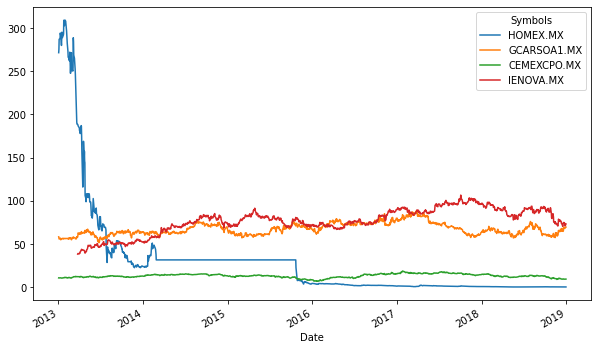

In [4]:
closes.plot(figsize=(10,6));

**- Ahora se procederá a calcular rendimientos porcentuales diarios de los 4 activos junto con sus características estadísticas y a su respectiva graficación.**

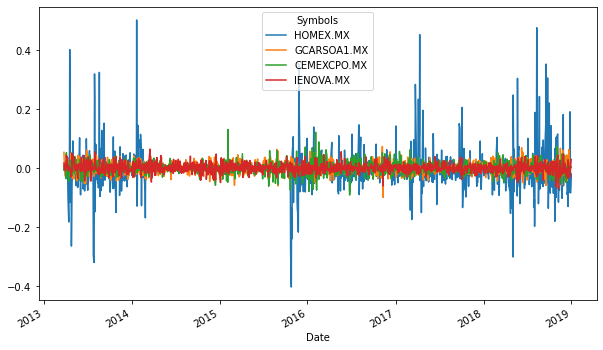

In [5]:
ret = closes.pct_change().dropna()
ret.plot(figsize=(10,6));

In [6]:
# Calculamos media y desviación estándar modo de hacerlo donde:
#Mu es la media
#Std la desviación estandar

#mu_HOMEX = ret.mean()['HOMEX.MX']
#sigma_HOMEX = ret.std()['HOMEX.MX']

#mu_HOMEX,sigma_HOMEX

In [7]:

mu_HOMEX, mu_GCARSOA1, mu_CEMEXCPO, mu_IENOVA = ret.mean()['HOMEX.MX'], ret.mean()['GCARSOA1.MX'], ret.mean()['CEMEXCPO.MX'],  ret.mean()['IENOVA.MX']
std_HOMEX, std_GCARSOA1, std_CEMEXCPO, std_IENOVA = ret.std()['HOMEX.MX'], ret.std()['GCARSOA1.MX'], ret.std()['CEMEXCPO.MX'], ret.std()['IENOVA.MX']

mu_HOMEX, mu_GCARSOA1, mu_CEMEXCPO, mu_IENOVA, std_HOMEX, std_GCARSOA1, std_CEMEXCPO, std_IENOVA

(-0.0031862673015005277,
 0.0003009465407796311,
 7.779725179102887e-06,
 0.0005678361443321252,
 0.05995698802712856,
 0.018767897430589466,
 0.019503661034010623,
 0.015444367373867127)

**> Ahora simularemos 1000 escenarios de rendimientos diarios para el año 2019 para cada empresa, para despues encontrar sus respectivos precios al cierre, y graficaquemos los precios simulados por empresa.**

In [8]:
# Funcion a utilizar:
def ret_sim(mu,sigma,ndays,nscen,start_date):
    dates = pd.date_range(start = start_date,periods=ndays)
    rend_sim = sigma*np.random.randn(ndays,nscen) + mu
    return pd.DataFrame(index = dates, data = rend_sim)

In [9]:
# Definicíon de parametros:
simret_HOMEX = ret_sim(mu_HOMEX, std_HOMEX, 365, 1000, '2019-01-01')
simret_GCARSOA1 = ret_sim(mu_GCARSOA1 ,std_GCARSOA1 , 365, 1000, '2019-01-01')
simret_CEMEXCPO = ret_sim(mu_CEMEXCPO,std_CEMEXCPO, 365, 1000, '2019-01-01')
simret_IENOVA = ret_sim(mu_IENOVA ,std_IENOVA , 365, 1000, '2019-01-01')

In [10]:
# la definición de los precios de cierre
simcloses_HOMEX = closes.iloc[-1]['HOMEX.MX']*((1+simret_HOMEX).cumprod())

In [11]:
simcloses_GCARSOA1 = closes.iloc[-1]['GCARSOA1.MX']*((1+simret_GCARSOA1).cumprod())

In [12]:
simcloses_CEMEXCPO = closes.iloc[-1]['CEMEXCPO.MX']*((1+simret_CEMEXCPO).cumprod())

In [13]:
simcloses_IENOVA = closes.iloc[-1]['IENOVA.MX']*((1+simret_IENOVA).cumprod())

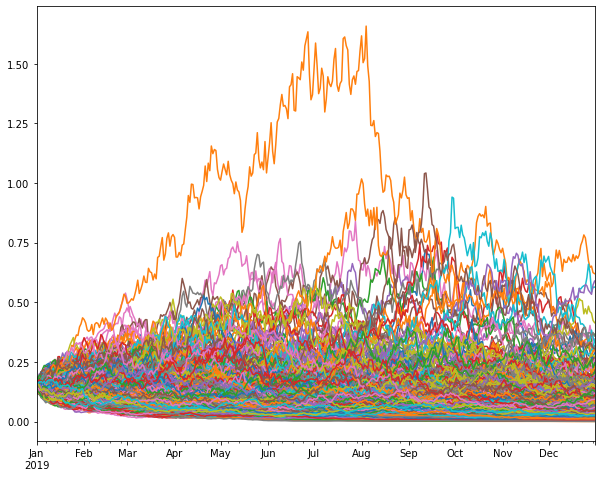

In [14]:
# La graficación:
simcloses_HOMEX.plot(figsize=(10,8),legend=False);

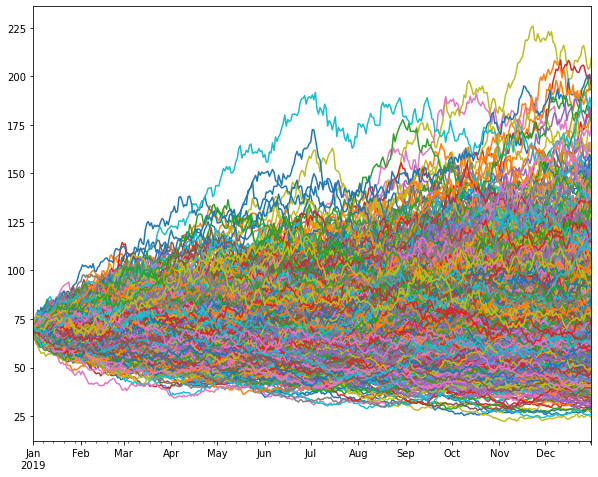

In [15]:
# La graficación:
simcloses_GCARSOA1.plot(figsize=(10,8),legend=False);

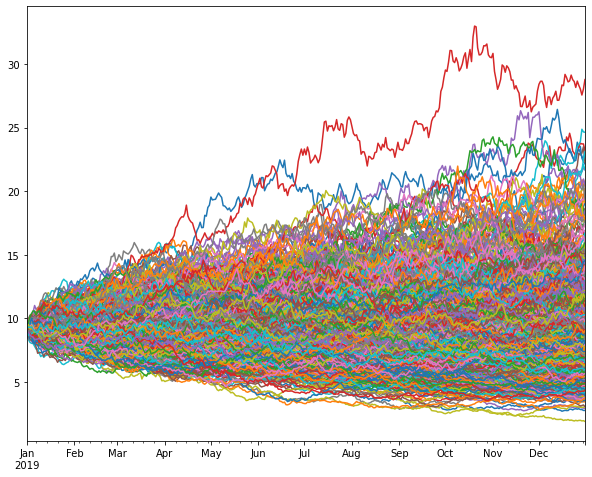

In [16]:
# La graficación:
simcloses_CEMEXCPO.plot(figsize=(10,8),legend=False);

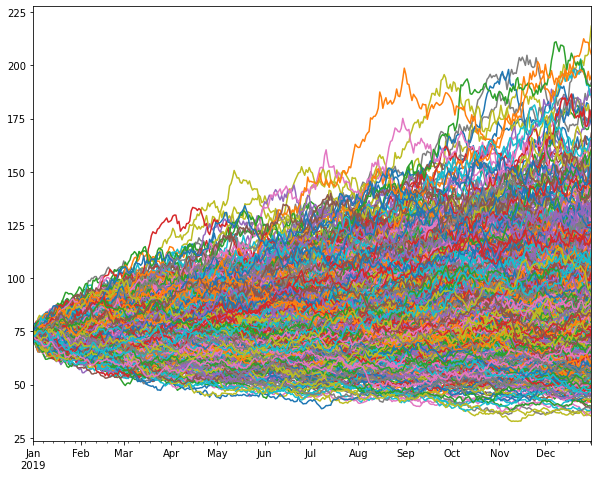

In [17]:
# La graficación:
simcloses_IENOVA.plot(figsize=(10,8),legend=False);

**> Ahora bien se calculará las probabilidades de que el ultimo precio de nuestra acción sea 15%.**

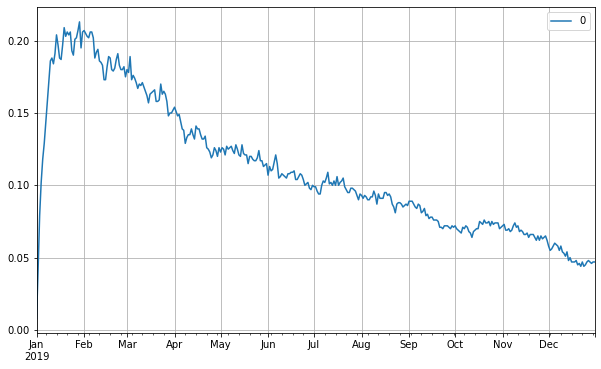

In [18]:
# Probabilidad de Desarrolladora Homex, SAB de CV de aumentar un 15% el valor de su acción.
K_HOMEX = (1+0.15)*closes.iloc[-1]['HOMEX.MX']
DF = simcloses_HOMEX>K_HOMEX
prob = pd.DataFrame(DF.sum(axis=1)/1000)
prob.plot(figsize=(10,6), grid=True);

In [19]:
# Precio objetivo:
K_HOMEX

0.17135000452399252

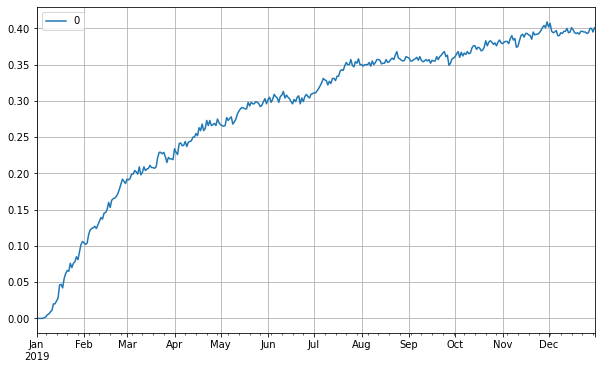

In [20]:
 # Probabilidad de Grupo Carso, SAB de CV de aumentar un 15% el valor de su acción.
K_GCARSOA1= (1+0.15)*closes.iloc[-1]['GCARSOA1.MX']
DF = simcloses_GCARSOA1>K_GCARSOA1
prob = pd.DataFrame(DF.sum(axis=1)/1000)
prob.plot(figsize=(10,6), grid=True);

In [21]:
# Precio objetivo:
K_GCARSOA1

79.91720886230468

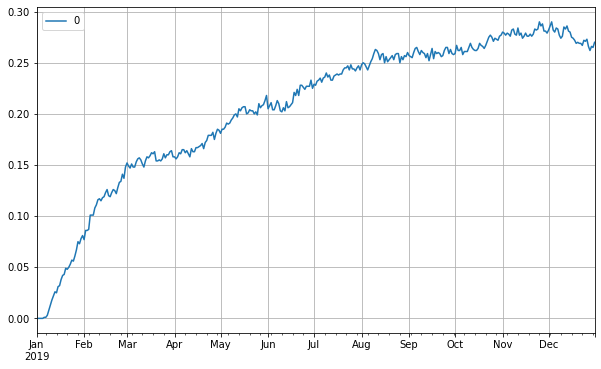

In [22]:
# Probabilidad de CEMEX, SAB de CV de aumentar un 15% el valor de su acción.
K_CEMEXCPO = (1+0.15)*closes.iloc[-1]['CEMEXCPO.MX']
DF = simcloses_CEMEXCPO>K_CEMEXCPO 
prob = pd.DataFrame(DF.sum(axis=1)/1000)
prob.plot(figsize=(10,6), grid=True);

In [23]:
# Precio objetivo:
K_CEMEXCPO

10.63794856071472

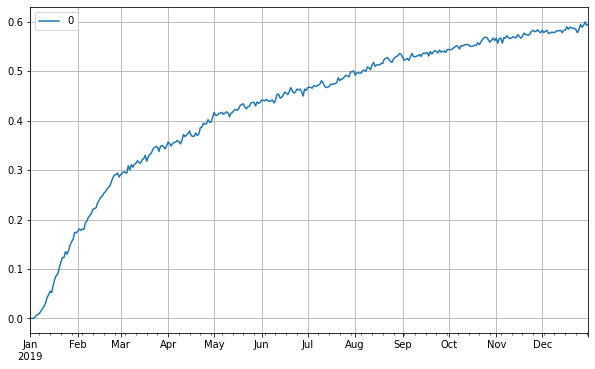

In [24]:
# Probabilidad de Infraestructura Energética Nova, SAB de CV de aumentar un 15% el valor de su acción.
K_IENOVA= (1+0.1)*closes.iloc[-1]['IENOVA.MX']
DF = simcloses_IENOVA>K_IENOVA
prob = pd.DataFrame(DF.sum(axis=1)/1000)
prob.plot(figsize=(10,6), grid=True);

In [25]:
# Precio objetivo:
K_IENOVA

80.45956344604492

**> Se descargarán los datos de los activos de cada empresa del año 2019 y se procederá hacer un análisis de estos datos reales contra las probabilidades de cada una de las empresas..**

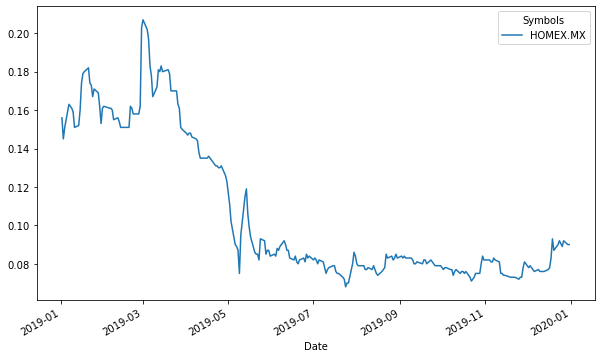

In [26]:
#Año completo Desarrolladora Homex, SAB de CV 2019.
start, end = '2019-01-01', '2019-12-31'
name = ['HOMEX.MX']
closes2019 = get_closes(names=name, start_date=start, end_date=end)
closes2019.plot(figsize=(10,6));

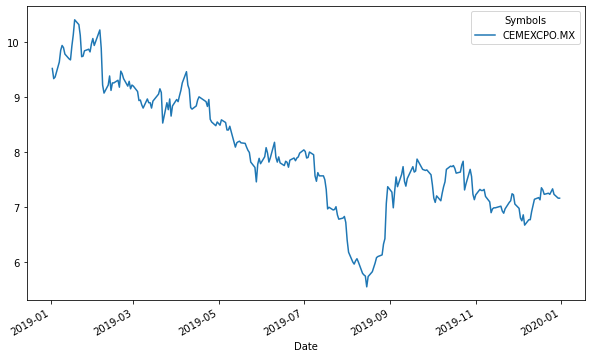

In [27]:
#Año completo CEMEX, SAB de CV  2019.
start, end = '2019-01-01', '2019-12-31'
name = ['CEMEXCPO.MX']
closes2019 = get_closes(names=name, start_date=start, end_date=end)
closes2019.plot(figsize=(10,6));

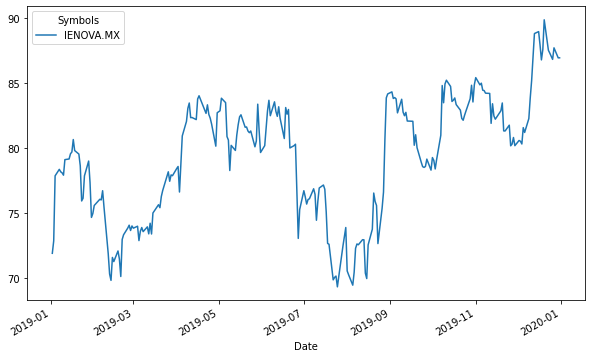

In [28]:
#Año completo Infraestructura Energética Nova, SAB de CV 2019.
start, end = '2019-01-01', '2019-12-31'
name = ['IENOVA.MX']
closes2019 = get_closes(names=name, start_date=start, end_date=end)
closes2019.plot(figsize=(10,6));

# Análisis de probabilidades en cuanto a datos reales Desarrolladora Homex, SAB de CV.

## Precio objetivo de 0.17 DLLS


### Primer trimestre Enero-Marzo 2019.

- Precio Real 0.16-0.20
- Probabilidad 0% - 17.5%
- Aquí si se obtuvo por el trimestre un valor arriba de 0.17, y como nos ejemplifica la tabla de probabilidad esta empresa tiende a elevar su precio a inicios del año.

### Segundo trimestre Abril-Junio 2019.

- Precio Real 0.16-0.8
- Probabilidad 17.5% - 8%
- Como se observa aquí bajo el valor real junto con la probabilidad.


### Tercer trimestre Julio-Septiembre 2019.

- Precio Real 0.8-0.8
- Probabilidad 8% - 6%
- El precio se mantuvo, pero la posibilidad bajo a poder tener el 10% de utilidad.

### Cuarto trimestre Octubre-Diciembre 2019.

- Precio Real 0.8-0.95
- Probabilidad 6% - 3%
- Como se observa la empresa al final de año recupero un poco su precio, pero no cumplió con su objetivo, por lo que la probabilidad también se va por los suelos.


# Análisis de probabilidades en cuanto a datos reales Grupo Carso, SAB de CV

## Precio objetivo de 80 DLLS


### Primer trimestre Enero-Marzo 2019.

- Precio Real 73-77
- Probabilidad 0% - 25%
- Se obtuvo un valor cercano al 10% de la utilidad, se tenia una probabilidad de un 25%.

### Segundo trimestre Abril-Junio 2019.

- Precio Real 68-73
- Probabilidad 25% - 35%
- Como se observa aquí bajo el valor real junto con la probabilidad.


### Tercer trimestre Julio-Septiembre 2019.

- Precio Real 51-73
- Probabilidad 35% - 38%
- En este trimestre tuvo una caída algo desfavorable el valor de la acción esta empresa.

### Cuarto trimestre Octubre-Diciembre 2019.

- Precio Real 57-72
- Probabilidad 38% - 42%
- La empresa se recuperó y termino con el mismo precio que empezó.

# Análisis de probabilidades en cuanto a datos reales CEMEX, SAB de CV

## Precio objetivo de 11 DLLS


### Primer trimestre Enero-Marzo 2019.

- Precio Real 8.5-10.5
- Probabilidad 0% - 20%
- Se obtuvo un valor cercano al 10% de la utilidad, se tenía una probabilidad de un 20%.

### Segundo trimestre Abril-Junio 2019.

- Precio Real 7.5-9.5
- Probabilidad 20% - 22.5%
- Se observo un declive y después una ascensión, pero la probabilidad sigue siendo muy baja.


### Tercer trimestre Julio-Septiembre 2019.

- Precio Real 5.50-8.2
- Probabilidad 22.5% - 28%
- En este trimestre fue el más bajo para el precio de la acción de la empresa.

### Cuarto trimestre Octubre-Diciembre 2019.

- Precio Real 7-8
- Probabilidad 28% - 25%
- La empresa perdió valor comercial ante la bolsa y la probabilidad nos lo dice.


# Análisis de probabilidades en cuanto a datos reales Infraestructura Energética Nova, SAB de CV

## Precio objetivo de 81 DLLS


### Primer trimestre Enero-Marzo 2019.

- Precio Real 70-81
- Probabilidad 0% - 38%
- Esta empresa logro su objetivo en el primer trimestre aparte de comenzar con una probabilidad alta.

### Segundo trimestre Abril-Junio 2019.

- Precio Real 73-84
- Probabilidad 38% - 48%
- LA empresa sigue teniendo momentos en donde su valor ya pasa el 10% de utilidad esperado y ta,bien baja pero no a numeros negativos. Ya entro al 50 de probabilidad de pasar nuestro limite establecido de 10%


### Tercer trimestre Julio-Septiembre 2019.

- Precio Real 75-85
- Probabilidad 48% - 55%
- Esta empresa va muy estable en cuanto a elevar su precio requiere, ya que sigue sin prensentar numero negativos.

### Cuarto trimestre Octubre-Diciembre 2019.

- Precio Real 82-90
- Probabilidad 55% - 65%
- Como podemos observar la empresa termino el año mas arriba del objetivo que nosotros habiamos propuestos, y con una probabilidad ya de 65% por lo que nuestra probabilidad es correcta y esta es la **mejor empresa de las 4 para invertir.** 


## Conclusión
Con este tipo de métodos deductivos, y con los correctos datos financieros, podemos tomar mejores decisiones a la hora de pensar si queremos invertir en la bolsa o no, como vemos nuestras probabilidades acertaban mucho en cuanto a cómo se comportan estas empresas en el año 2019 con base en los datos que obtuvimos de los años atrás. 
Creo que es importante dale la importancia a este tipo de métodos antes de tomar una decisión en cuanto a invertir se refiere.

.